<a href="https://colab.research.google.com/github/PaulD10/Projet-PESSD/blob/main/PESSD_INSEE_PROJET_STAT_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# I - Description des données et statistiques descriptives

In [106]:
#Importation des données de scraping
df_premiere = pd.read_csv("/content/insee_publications_premiere_complete.csv")
df_analyse = pd.read_csv("/content/insee_publications_analyse_complete.csv")
df_analyse.head()

Year                                 Category  \
0  2011  Démographie et création des entreprises   
1  2011                        Economie générale   
2  2012                                  Chômage   
3  2012                        Economie générale   
4  2012                     Pauvreté - Précarité   

                                               Title  \
0  Les seuils de 10, 20 et 50 salariés : un impac...   
1  Services à domicile : quel effet des incitatio...   
2  Le RMI, puis le RSA découragent-ils certains j...   
3  Prix du pétrole et crise de la dette : quels e...   
4  Le RMI, puis le RSA découragent-ils certains j...   

                                            Abstract  \
0  Il existe en France de nombreux seuils d'effec...   
1  e.Depuis 1991, les ménages ont la possibilité ...   
2  L'éligibilité au revenu de solidarité active (...   
3  vité d'un quart de point de produit intérieur ...   
4  L'éligibilité au revenu de solidarité active (...   

                                           Full_Text  \
0  les effets de seuil sont plus ou moins marqués...   
1  le recours aux services à domicile progresse p...   
2  le rmi et le rsa sont deux dispositifs d'aide ...   
3  fin les prix du pétrole et de l'ensemble des m...   
4  le rmi et le rsa sont deux dispositifs d'aide ...   

                                         Methodology  \
0  les effets de seuil sont plus ou moins marqués...   
1  le recours aux services à domicile progresse p...   
2  le rmi et le rsa sont deux dispositifs d'aide ...   
3  fin les prix du pétrole et de l'ensemble des m...   
4  le rmi et le rsa sont deux dispositifs d'aide ...   

                                            Concepts  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3  Prix du pétrole et des matières premières, Cri...  
4                                                NaN

In [107]:
df_premiere['Publication'] = 'Premiere'
df_analyse['Publication'] = 'Analyse'
df_combined = pd.concat([df_premiere, df_analyse], ignore_index=True)
df_combined.head(5)

Year                          Category  \
0  2010                       Agriculture   
1  2010                       Agriculture   
2  2010  Caractéristiques des entreprises   
3  2010  Caractéristiques des entreprises   
4  2010                           Chômage   

                                               Title  \
0  Les comptes prévisionnels de la branche agricu...   
1       L’agriculture en 2009 en France et en Europe   
2           Quatre nouvelles catégories d'entreprise   
3  Depuis trente ans, les grandes entreprises con...   
4  Les conséquences de la crise sur l’emploi dans...   

                                            Abstract  \
0  L’année agricole 2010 est marquée par la baiss...   
1  En 2009, en France comme dans l’Union européen...   
2  L’entreprise était jusqu'à présent définie sur...   
3  Les salariés du secteur privé travaillent aujo...   
4  La crise économique a davantage touché les rég...   

                                           Full_Text  \
0  forte remontée des prix des grandes cultures e...   
1  baisse de la valeur de la production agricole ...   
2  d une définition juridique à une définition éc...   
3  en des salariés travaillent dans une entrepris...   
4  davantage d emplois perdus dans le nord-est qu...   

                                         Methodology  \
0  forte remontée des prix des grandes cultures e...   
1  baisse de la valeur de la production agricole ...   
2  d une définition juridique à une définition éc...   
3  en des salariés travaillent dans une entrepris...   
4  davantage d emplois perdus dans le nord-est qu...   

                                            Concepts Publication  
0  céréales, oléagineux, protéagineux, betteraves...    Premiere  
1  production végétale, production animale, résul...    Premiere  
2  approximation, profilage, enquête sur les liai...    Premiere  
3                                                NaN    Premiere  
4       économie présentielle, économie présentielle    Premiere

In [125]:
category_to_theme = {
    'Agriculture': "Secteurs d'activité",
    'Caractéristiques des entreprises': "Entreprises",
    'Chômage': "Marché du travail - Salaires",
    'Commerce': "Secteurs d'activité",
    'Comptes nationaux annuels': "Economie - Conjoncture - Compte nationaux",
    'Consommation et équipement des ménages': "Revenu - Pouvoir d'achat - Consommation",
    'Couple - Familles - Ménages': 'Démographie',
    'Dynamique des territoires': "Territoires, villes et quartiers",
    'Démographie et création des entreprises': "Entreprises",
    'Education - Formation - Compétences': "Conditions de vie - Société",
    'Egalité femmes-hommes': "Conditions de vie - Société",
    'Emploi - Population active': "Marché du travail - Salaires",
    'Entreprises': "Entreprises",
    'Equipements et services à la population': "Territoires, villes et quartiers",
    'Evolution et structure de la population': 'Démographie',
    'Industrie': "Secteurs d'activité",
    'Logement': "Conditions de vie - Société",
    'Mobilités - Déplacements - Frontaliers': "Territoires, villes et quartiers",
    'Mondialisation, compétitivité et innovation': "Entreprises",
    'Patrimoine': "Revenu - Pouvoir d'achat - Consommation",
    'Pauvreté - Précarité': "Revenu - Pouvoir d'achat - Consommation",
    'Revenus - Niveau de vie - Pouvoir d\'achat - Consommation': "Revenu - Pouvoir d'achat - Consommation",
    'Salaires et revenus d\'activité': "Marché du travail - Salaires",
    'Santé - Handicap - Dépendance': "Conditions de vie - Société",
    'Services': "Secteurs d'activité",
    'Société - Vie sociale - Elections': "Conditions de vie - Société",
    'Tourisme': "Secteurs d'activité",
    'Transports': "Secteurs d'activité",
    'Villes et quartiers': "Territoires, villes et quartiers",
    'Economie sociale et solidaire': "Secteurs d'activité",
    'Environnement': "Développement durable - Environnement",
    'Protection sociale - Retraites': "Revenu - Pouvoir d'achat - Consommation",
    'Développement durable': "Développement durable - Environnement",
    'Loisirs - Culture': "Conditions de vie - Société",
    'Sécurité - Justice': "Conditions de vie - Société",
    'Comptes nationaux trimestriels': "Economie - Conjoncture - Compte nationaux",
    'Construction': "Secteurs d'activité",
    'Economie générale': "Economie - Conjoncture - Compte nationaux",
    'Finances publiques': "Economie - Conjoncture - Compte nationaux",
    'Naissances - Fécondité': 'Démographie',
    'Commerce extérieur': "Economie - Conjoncture - Compte nationaux"
}

# Apply the mapping to create the theme column
df_combined['Theme'] = df_combined['Category'].map(category_to_theme)
# Create a new column 'Period' which groups the years into 4-year periods
df_combined['Period'] = (df_combined['Year'] - 2010) // 4 * 4 + 2010
df_combined['Period'] = df_combined['Period'].where(df_combined['Year'] <= 2021, 2022)

df_combined.head()

Unnamed: 0  Year                          Category  \
0           0  2010                       Agriculture   
1           1  2010                       Agriculture   
2           2  2010  Caractéristiques des entreprises   
3           3  2010  Caractéristiques des entreprises   
4           4  2010                           Chômage   

                                               Title  \
0  Les comptes prévisionnels de la branche agricu...   
1       L’agriculture en 2009 en France et en Europe   
2           Quatre nouvelles catégories d'entreprise   
3  Depuis trente ans, les grandes entreprises con...   
4  Les conséquences de la crise sur l’emploi dans...   

                                            Abstract  \
0  L’année agricole 2010 est marquée par la baiss...   
1  En 2009, en France comme dans l’Union européen...   
2  L’entreprise était jusqu'à présent définie sur...   
3  Les salariés du secteur privé travaillent aujo...   
4  La crise économique a davantage touché les rég...   

                                           Full_Text  \
0  forte remontée des prix des grandes cultures e...   
1  baisse de la valeur de la production agricole ...   
2  d une définition juridique à une définition éc...   
3  en des salariés travaillent dans une entrepris...   
4  davantage d emplois perdus dans le nord-est qu...   

                                         Methodology  \
0  forte remontée des prix des grandes cultures e...   
1  baisse de la valeur de la production agricole ...   
2  d une définition juridique à une définition éc...   
3  en des salariés travaillent dans une entrepris...   
4  davantage d emplois perdus dans le nord-est qu...   

                                            Concepts Publication  \
0  céréales, oléagineux, protéagineux, betteraves...    Premiere   
1  production végétale, production animale, résul...    Premiere   
2  approximation, profilage, enquête sur les liai...    Premiere   
3                                                NaN    Premiere   
4       économie présentielle, économie présentielle    Premiere   

                          Theme  Period  
0           Secteurs d'activité    2010  
1           Secteurs d'activité    2010  
2                   Entreprises    2010  
3                   Entreprises    2010  
4  Marché du travail - Salaires    2010

Les articles recouvrant parfois plusieurs thématiques de l'INSEE, les analyses descriptives considérerons un seul article publié sous deux thèmes différents comme deux articles distincts. Une fois les analyses descriptives réalisées, les doublons seront éliminés du corpus.

In [109]:
# 1. Compter les doublons d'articles
duplicate_counts = df_combined['Full_Text'].value_counts()
num_duplicates = (duplicate_counts > 1).sum()

# 2. Identifier les recoupements entre catégories
cross_category = df_combined.groupby('Full_Text')['Category'].apply(set).reset_index()
cross_category = cross_category[cross_category['Category'].apply(len) > 1]  # Articles ayant plusieurs catégories

# 3. Identifier les articles ayant deux publications différentes
cross_publication = df_combined.groupby('Full_Text')['Publication'].apply(set).reset_index()
cross_publication = cross_publication[cross_publication['Publication'].apply(len) > 1]  # Articles ayant plusieurs publications
num_cross_publication = len(cross_publication)

# 4. Statistiques générales
stats = {
    "Nombre total d'articles dans la base": df_combined.shape[0],
    "Nombre total d'articles uniques": df_combined['Full_Text'].nunique(),
    "Nombre total de catégories": df_combined['Category'].nunique(),
    "Articles ayant plusieurs catégories": len(cross_category),
    "Articles ayant plusieurs publications": num_cross_publication,
}

# 5. Statistiques détaillées par publication
def stats_per_publication(group):
    grouped_category = group.groupby('Full_Text')['Category'].apply(set).reset_index()
    articles_multi_categories = grouped_category[grouped_category['Category'].apply(len) > 1]

    return {
        "Nombre total d'articles uniques": group['Full_Text'].nunique(),
        "Nombre total de catégories": group['Category'].nunique(),
        "Articles ayant plusieurs catégories": len(articles_multi_categories),
        "Moyenne de catégories par article": group.groupby('Full_Text')['Category'].nunique().mean()
    }

# Exclure la colonne "Publication" pour éviter le Warning
stats_by_publication = df_combined.groupby('Publication', group_keys=False).apply(stats_per_publication).to_dict()

# Affichage des résultats
print("Statistiques générales :")
for key, value in stats.items():
    print(f"{key}: {value}")

print("Statistiques par publication :")
for publication, stats in stats_by_publication.items():
    print(f"\n{publication}:")
    for key, value in stats.items():
        print(f"  {key}: {value}")


Statistiques générales :
Nombre total d'articles dans la base: 1060
Nombre total d'articles uniques: 786
Nombre total de catégories: 41
Articles ayant plusieurs catégories: 246
Articles ayant plusieurs publications: 0
Statistiques par publication :

Analyse:
  Nombre total d'articles uniques: 64
  Nombre total de catégories: 17
  Articles ayant plusieurs catégories: 14
  Moyenne de catégories par article: 1.25

Premiere:
  Nombre total d'articles uniques: 722
  Nombre total de catégories: 37
  Articles ayant plusieurs catégories: 232
  Moyenne de catégories par article: 1.353185595567867


<ipython-input-109-8c686056d12a>:36: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [110]:
print("\n Distribution des catégories dans l'ensemble des données:")
category_counts = df_combined['Category'].value_counts()
print(category_counts.head(15))

print("\n Distribution des thèmes dans l'ensemble des données:")
category_counts = df_combined['Theme'].value_counts()
print(category_counts.head(15))



 Distribution des catégories dans l'ensemble des données:
Category
Salaires et revenus d'activité                              89
Emploi - Population active                                  85
Caractéristiques des entreprises                            58
Evolution et structure de la population                     55
Mondialisation, compétitivité et innovation                 47
Commerce                                                    42
Revenus - Niveau de vie - Pouvoir d'achat - Consommation    41
Services                                                    40
Egalité femmes-hommes                                       40
Démographie et création des entreprises                     39
Comptes nationaux annuels                                   38
Couple - Familles - Ménages                                 36
Entreprises                                                 36
Industrie                                                   34
Agriculture                                       

In [111]:
# 3. Identifier les articles multi-catégories
articles_by_category = df_combined.groupby('Full_Text')['Category'].apply(list)
multi_category_articles = articles_by_category[articles_by_category.apply(lambda x: len(set(x)) > 1)]

# 4. Analyser quelles catégories apparaissent le plus souvent ensemble
print("\n Top combinaisons de catégories:")
category_combinations = []
for categories in multi_category_articles:
    unique_cats = sorted(list(set(categories)))
    for i in range(len(unique_cats)):
        for j in range(i+1, len(unique_cats)):
            category_combinations.append((unique_cats[i], unique_cats[j]))

if category_combinations:
    combo_counts = pd.Series(category_combinations).value_counts()
    print(combo_counts.head(10))  # Top 10 des combinaisons

# 5. Catégories les plus concernées par le multi-catégoriel
print("\n Catégories les plus présentes dans des articles multi-catégories:")
multi_cats_flat = [cat for sublist in multi_category_articles for cat in set(sublist)]
multi_cat_counts = pd.Series(multi_cats_flat).value_counts()
print(multi_cat_counts.head(10))


 Top combinaisons de catégories:
(Démographie et création des entreprises, Entreprises)                              36
(Chômage, Emploi - Population active)                                               18
(Pauvreté - Précarité, Revenus - Niveau de vie - Pouvoir d'achat - Consommation)    15
(Caractéristiques des entreprises, Mondialisation, compétitivité et innovation)     11
(Egalité femmes-hommes, Emploi - Population active)                                  9
(Caractéristiques des entreprises, Industrie)                                        6
(Couple - Familles - Ménages, Evolution et structure de la population)               6
(Couple - Familles - Ménages, Egalité femmes-hommes)                                 6
(Dynamique des territoires, Emploi - Population active)                              5
(Egalité femmes-hommes, Salaires et revenus d'activité)                              5
Name: count, dtype: int64

 Catégories les plus présentes dans des articles multi-catégories:
Em

In [112]:
# 6. Pourcentage d'articles multi-catégories par catégorie
print("\n Pourcentage d'articles multi-catégories par catégorie:")
total_by_category = df_combined['Category'].value_counts()
multi_cat_percentage = pd.DataFrame({
    'Total': total_by_category,
    'Multi': multi_cat_counts
}).fillna(0)
multi_cat_percentage['Pourcentage'] = (multi_cat_percentage['Multi'] / multi_cat_percentage['Total'] * 100).round(2)
print(multi_cat_percentage.sort_values('Pourcentage', ascending=False).head(20))


 Pourcentage d'articles multi-catégories par catégorie:
                                                    Total  Multi  Pourcentage
Commerce extérieur                                      1    1.0       100.00
Comptes nationaux trimestriels                          2    2.0       100.00
Entreprises                                            36   36.0       100.00
Démographie et création des entreprises                39   38.0        97.44
Chômage                                                25   22.0        88.00
Santé - Handicap - Dépendance                           9    7.0        77.78
Egalité femmes-hommes                                  40   31.0        77.50
Sécurité - Justice                                      4    3.0        75.00
Développement durable                                   4    3.0        75.00
Dynamique des territoires                              22   16.0        72.73
Loisirs - Culture                                       7    5.0        71.43
Environ

In [113]:
print("\n🔹 Distribution temporelle des catégories:")
# Compter par année
print("\nNombre d'articles par année:")
year_counts = df_combined.groupby('Year').size()
print(year_counts)

# Top catégories par année
print("\nTop catégories par année:")
for year in sorted(df_combined['Year'].unique()):
    year_data = df_combined[df_combined['Year'] == year]
    top_cats = year_data['Category'].value_counts().head(5)
    print(f"\nAnnée {year}:")
    print(top_cats)



🔹 Distribution temporelle des catégories:

Nombre d'articles par année:
Year
2010    66
2011    70
2012    59
2013    72
2014    61
2015    62
2016    57
2017    62
2018    55
2019    91
2020    64
2021    77
2022    77
2023    83
2024    83
2025    21
dtype: int64

Top catégories par année:

Année 2010:
Category
Emploi - Population active                 8
Evolution et structure de la population    6
Salaires et revenus d'activité             6
Services                                   5
Commerce                                   4
Name: count, dtype: int64

Année 2011:
Category
Evolution et structure de la population    4
Commerce                                   4
Salaires et revenus d'activité             4
Pauvreté - Précarité                       4
Emploi - Population active                 4
Name: count, dtype: int64

Année 2012:
Category
Salaires et revenus d'activité       7
Société - Vie sociale - Elections    4
Emploi - Population active           3
Chômage              

<Figure size 1200x800 with 0 Axes>

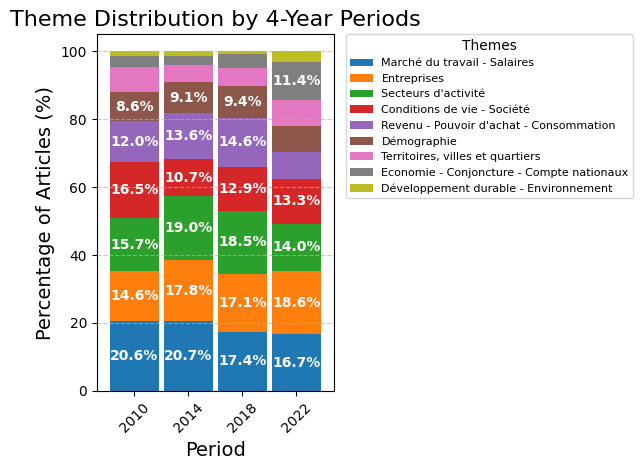

In [114]:
# Create a crosstab to get the count of themes per period
theme_counts = pd.crosstab(df_combined['Period'], df_combined['Theme'])

# Normalize to get percentages
theme_percentages = theme_counts.div(theme_counts.sum(axis=1), axis=0) * 100

# Sort themes by overall frequency
theme_order = theme_counts.sum().sort_values(ascending=False).index

# Set up the figure with a reasonable size
plt.figure(figsize=(12, 8))

# Create a stacked bar chart
ax = theme_percentages[theme_order].plot(kind='bar', stacked=True, width=.9)

# Improve the appearance
plt.title('Theme Distribution by 4-Year Periods', fontsize=16)
plt.xlabel('Period', fontsize=14)
plt.ylabel('Percentage of Articles (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Handle the legend effectively
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Themes',
          bbox_to_anchor=(1.05, 1),
          loc='upper left',
          borderaxespad=0.,
          fontsize=8)

# Add percentage labels for themes that take up significant space
for i, bar in enumerate(ax.patches):
    if bar.get_height() > 8:  # Only show labels for themes that take up more than 8% of articles
        ax.text(bar.get_x() + bar.get_width()/2,
                bar.get_y() + bar.get_height()/2,
                f'{bar.get_height():.1f}%',
                ha='center', va='center',
                color='white', fontweight='bold')

plt.tight_layout()
#plt.savefig('theme_distribution_by_period.png', dpi=300, bbox_inches='tight')
plt.show()


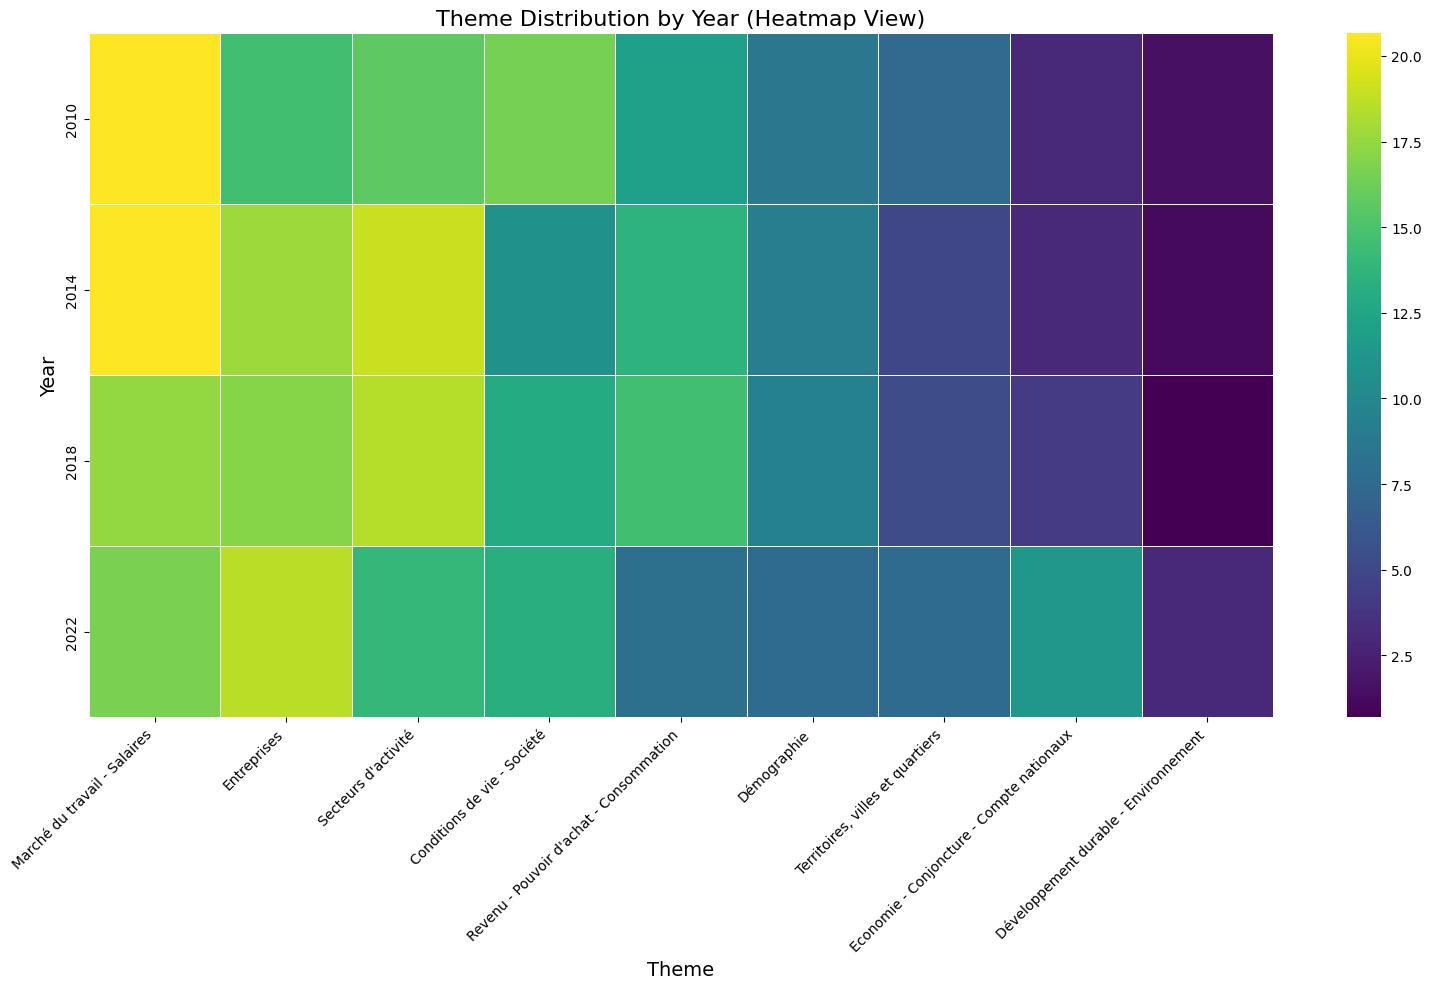

In [115]:
# Alternative visualization: heatmap for better readability with many themes
plt.figure(figsize=(16, 10))
sns.heatmap(theme_percentages[theme_order],
            cmap='viridis',
            annot=False,  # Set to True if you want to show values
            fmt='.1f',
            linewidths=.5)

plt.title('Theme Distribution by Year (Heatmap View)', fontsize=16)
plt.xlabel('Theme', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig('theme_distribution_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

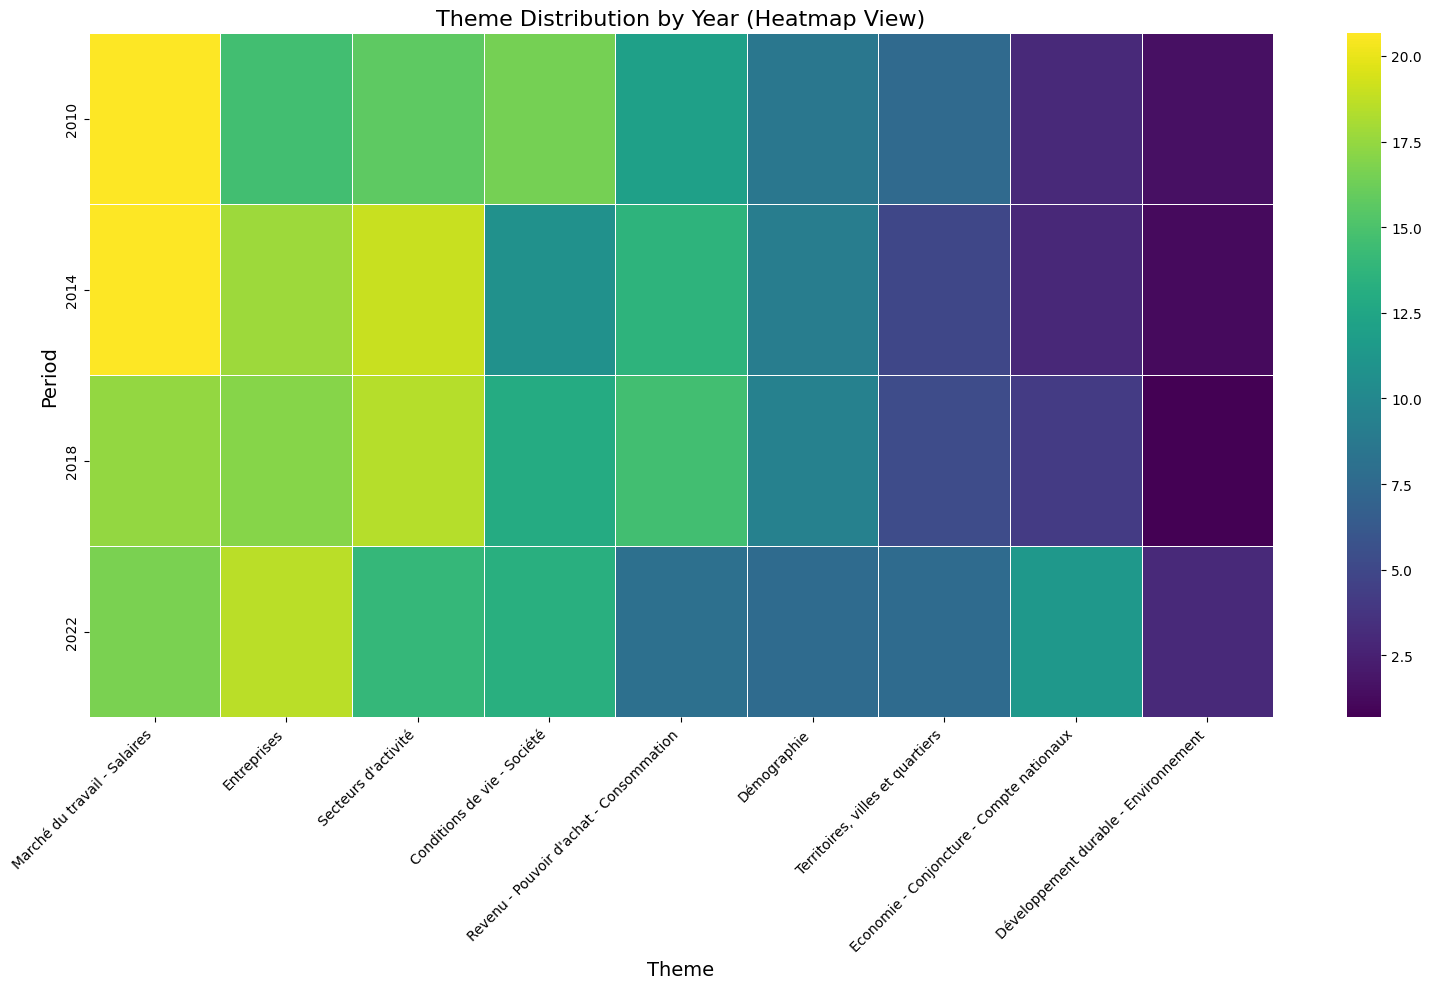

In [116]:
# Alternative visualization: heatmap for better readability with many themes
plt.figure(figsize=(16, 10))
sns.heatmap(theme_percentages[theme_order],
            cmap='viridis',
            annot=False,  # Set to True if you want to show values
            fmt='.1f',
            linewidths=.5)

plt.title('Theme Distribution by Year (Heatmap View)', fontsize=16)
plt.xlabel('Theme', fontsize=14)
plt.ylabel('Period', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig('theme_distribution_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [117]:
df_combined.to_csv("insee_publications_complet.csv", encoding='utf-8')

## La structure globale des publications d'INSEE Analyse et INSEE Première a peu évolué même si elle tend lentement à devenir de plus en plus généraliste.


# Embedding et carte des mots employés

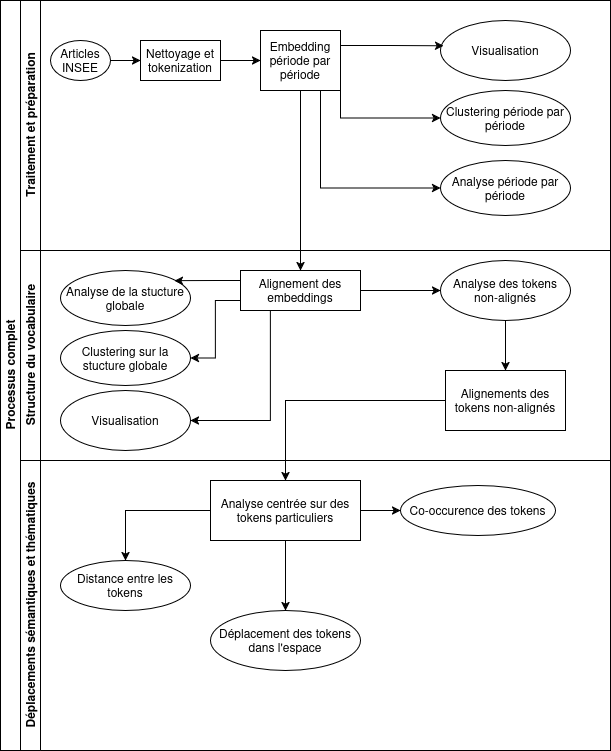

In [118]:
#!pip cache purge
#!pip uninstall -y gensim numpy scipy umap-learn
#!pip install gensim==4.3.3 numpy==1.24.0 scipy==1.9.3
#!pip install pacmap
#!pip install datamapplot


In [119]:
#!python -m spacy download fr_core_news_lg

In [4]:
import numpy as np
import pandas as pd
import gensim
import spacy
import re
from gensim.models import Word2Vec
from tqdm.auto import tqdm
from sklearn.cluster import KMeans
import plotly.graph_objs as go
import pacmap
#import umap.umap_ as umap
import plotly.express as px
import matplotlib
#from gap_stat import OptimalK
import io
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import random
from collections import defaultdict
from numpy.linalg import norm
import datamapplot as dmp
from scipy.spatial.distance import cosine
import os

seed_value = 1312
random.seed(seed_value)
np.random.seed(seed_value)

/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


In [126]:
df_combined = pd.read_csv("/content/insee_publications_complet.csv")
class INSEETextEmbedding:
    def __init__(self, min_word_freq=2, max_words=5000000):
        print("Initializing text analyzer...")
        self.nlp = spacy.load('fr_core_news_lg', disable=["ner", "parser"])
        self.min_word_freq = min_word_freq
        self.max_words = max_words
        self.stop_words = set(self.nlp.Defaults.stop_words)
        self.stop_words.update(["insee", "encadré","source","méthode","consulter","figure", "être", "avoir", "ainsi", "dont", "etc"])
        self.processed_texts = []

    def clean_text(self, text):
        text = re.sub(r'\[.*?\]', '', text)
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[¹²³⁴⁵⁶⁷⁸⁹⁰]+', '', text)
        text = re.sub(r'\[^0-9a-zA-Z]+','',text)
        text = ' '.join(text.split()).lower()

        return text

    def process_texts(self, texts):
        processed_texts = []
        for text in tqdm(texts, desc="Processing texts"):
            doc = self.nlp(self.clean_text(text))
            tokens = []
            for token in doc:
                    if (token.pos_ in ['NOUN', 'VERB', 'ADJ', 'PROPN'] and
                        not token.is_stop and
                        not token.is_punct and
                        len(token.text) > 2 and
                        token.lemma_ not in self.stop_words):
                        tokens.append(token.lemma_)
            if tokens:
                processed_texts.append(tokens)
        #print(processed_texts)
        return processed_texts

    def create_focused_embeddings(self, processed_texts):
        """Create word embeddings with enhanced parameters."""
        if not processed_texts:
            raise ValueError("No processed texts available for embedding creation")
        print("\nAnalyzing word frequencies...")
        # Count word frequencies
        word_freq = defaultdict(int)
        for text in tqdm(processed_texts, desc="Counting words"):
            for token in text:
                word_freq[token] += 1
        # Filter by frequency
        filtered_freq = {word: freq for word, freq in word_freq.items()
                        if freq >= self.min_word_freq}

        print(f"\nFound {len(filtered_freq)} words occurring at least {self.min_word_freq} times")

        # Select top words
        top_words = dict(sorted(filtered_freq.items(),
                            key=lambda x: x[1],
                            reverse=True)[:self.max_words])

        print("\nTop 20 most frequent words:")
        for word, freq in list(top_words.items())[:20]:
            print(f"{word}: {freq}")

        # Prepare texts for Word2Vec
        filtered_texts = [[word for word in text if word in top_words]
                        for text in processed_texts]
        filtered_texts = [text for text in filtered_texts if text]
        return filtered_texts

    def train_word_embeddings(self, processed_texts, categories,themes, model_type='word2vec'):
        print(f"Training {model_type} model with category tracking...")
        model_class = Word2Vec if model_type == 'word2vec' else FastText
        model = model_class(sentences=processed_texts, vector_size=200, window=10, min_count=self.min_word_freq, sg=1, workers=4)

        # Create a dictionary to track word-category occurrences
        word_category_counts = defaultdict(lambda: defaultdict(int))
        word_theme_counts = defaultdict(lambda: defaultdict(int))
        word_freq = defaultdict(int)

        # Loop over processed_texts once
        for text_tokens, category, theme in zip(processed_texts, categories, themes):
            for token in text_tokens:
                word_freq[token] += 1
                word_category_counts[token][category] += 1
                word_theme_counts[token][theme] += 1

        # Assign word frequencies to the model
        model.wv.word_freq = word_freq

        # Find the most common category for each word
        word_most_common_category = {
            word: max(category_counts.items(), key=lambda x: x[1])[0]
            for word, category_counts in word_category_counts.items()
        }

        # Find the most common theme for each word
        word_most_common_theme = {
            word: max(theme_counts.items(), key=lambda x: x[1])[0]
            for word, theme_counts in word_theme_counts.items()
        }

        # Assign attributes to the model
        model.wv.word_most_common_category = word_most_common_category
        model.wv.word_most_common_theme = word_most_common_theme
        model.wv.word_category_counts = dict(word_category_counts)
        model.wv.word_theme_counts = dict(word_theme_counts)

        return model

# Process texts
def main(df, period):
    texts = df["Methodology"].dropna()
    categories = df["Category"]
    themes = df["Theme"]

    embedding_model = INSEETextEmbedding()
    processed_texts = embedding_model.process_texts(texts)
    filtered_texts = embedding_model.create_focused_embeddings(processed_texts)
    word2vec_model = embedding_model.train_word_embeddings(filtered_texts, categories, themes, model_type='word2vec')
    print("An occurences : ",word2vec_model.wv.word_freq.get("an"))
    print("Femme categorie : ",word2vec_model.wv.word_most_common_category.get("femme"))
    print("Femme theme : ",word2vec_model.wv.word_most_common_theme.get("femme"))
    print("Décile count: ",word2vec_model.wv.word_category_counts.get("décile"))
    word2vec_model.save(f"embedding{period}.model")


df_2010_2013 = df_combined[df_combined['Period'] == 2010]
df_2014_2017 = df_combined[df_combined['Period'] == 2014]
df_2018_2021 = df_combined[df_combined['Period'] == 2018]
df_2022_2025 = df_combined[df_combined['Period'] == 2022]

main(df_combined, "2010-2025")
main(df_2010_2013, "2010-2013")
main(df_2014_2017, "2014-2017")
main(df_2018_2021, '2018-2021')
main(df_2018_2021, '2022-2025')

Initializing text analyzer...


Processing texts:   0%|          | 0/975 [00:00<?, ?it/s]


Analyzing word frequencies...


Counting words:   0%|          | 0/975 [00:00<?, ?it/s]


Found 9808 words occurring at least 2 times

Top 20 most frequent words:
an: 15711
tableau: 13842
graphique: 12372
emploi: 11979
activité: 11845
france: 10605
entreprise: 10515
figurer: 10466
euro: 9225
salarié: 8504
ménage: 8209
secteur: 7862
lecture: 7628
femme: 7237
revenu: 6933
part: 6762
année: 6721
évolution: 6600
niveau: 6599
moyen: 6270
Training word2vec model with category tracking...
An occurences :  15711
Femme categorie :  Egalité femmes-hommes
Femme theme :  Conditions de vie - Société
Décile count:  defaultdict(<class 'int'>, {'Caractéristiques des entreprises': 8, 'Pauvreté - Précarité': 93, "Revenus - Niveau de vie - Pouvoir d'achat - Consommation": 204, "Salaires et revenus d'activité": 243, 'Logement': 32, 'Economie sociale et solidaire': 1, 'Société - Vie sociale - Elections': 15, 'Emploi - Population active': 53, 'Consommation et équipement des ménages': 18, 'Couple - Familles - Ménages': 33, 'Patrimoine': 22, 'Dynamique des territoires': 3, 'Egalité femmes-hommes'

Processing texts:   0%|          | 0/267 [00:00<?, ?it/s]


Analyzing word frequencies...


Counting words:   0%|          | 0/267 [00:00<?, ?it/s]


Found 4764 words occurring at least 2 times

Top 20 most frequent words:
an: 3360
emploi: 2310
tableau: 1972
activité: 1808
entreprise: 1792
salarié: 1676
graphique: 1638
secteur: 1610
ménage: 1610
femme: 1608
euro: 1434
population: 1365
france: 1299
revenu: 1295
année: 1267
service: 1255
ensemble: 1193
part: 1153
point: 1144
nombre: 1122
Training word2vec model with category tracking...
An occurences :  3360
Femme categorie :  Egalité femmes-hommes
Femme theme :  Marché du travail - Salaires
Décile count:  defaultdict(<class 'int'>, {'Caractéristiques des entreprises': 5, 'Pauvreté - Précarité': 38, "Revenus - Niveau de vie - Pouvoir d'achat - Consommation": 48, "Salaires et revenus d'activité": 40, 'Logement': 3, 'Economie sociale et solidaire': 1, 'Société - Vie sociale - Elections': 15, 'Emploi - Population active': 1, 'Economie générale': 8, 'Education - Formation - Compétences': 7})
Initializing text analyzer...


Processing texts:   0%|          | 0/242 [00:00<?, ?it/s]


Analyzing word frequencies...


Counting words:   0%|          | 0/242 [00:00<?, ?it/s]


Found 4927 words occurring at least 2 times

Top 20 most frequent words:
an: 3360
activité: 3080
tableau: 3057
figurer: 2954
graphique: 2720
entreprise: 2553
emploi: 2549
france: 2302
euro: 2141
femme: 1874
salarié: 1841
secteur: 1838
service: 1674
année: 1594
moyen: 1584
part: 1566
homme: 1527
ensemble: 1523
ménage: 1497
évolution: 1486
Training word2vec model with category tracking...
An occurences :  3360
Femme categorie :  Egalité femmes-hommes
Femme theme :  Conditions de vie - Société
Décile count:  defaultdict(<class 'int'>, {'Consommation et équipement des ménages': 18, 'Pauvreté - Précarité': 34, "Revenus - Niveau de vie - Pouvoir d'achat - Consommation": 32, "Salaires et revenus d'activité": 64, 'Couple - Familles - Ménages': 11, 'Patrimoine': 2, 'Economie générale': 15})
Initializing text analyzer...


Processing texts:   0%|          | 0/274 [00:00<?, ?it/s]


Analyzing word frequencies...


Counting words:   0%|          | 0/274 [00:00<?, ?it/s]


Found 6630 words occurring at least 2 times

Top 20 most frequent words:
an: 5383
tableau: 5080
graphique: 4535
figurer: 4468
emploi: 4288
activité: 3810
france: 3690
euro: 3443
salarié: 2933
lecture: 2909
entreprise: 2746
ménage: 2712
évolution: 2605
femme: 2601
niveau: 2397
secteur: 2394
vie: 2366
onglet: 2358
contenir: 2266
année: 2206
Training word2vec model with category tracking...
An occurences :  5383
Femme categorie :  Egalité femmes-hommes
Femme theme :  Conditions de vie - Société
Décile count:  defaultdict(<class 'int'>, {'Patrimoine': 20, 'Pauvreté - Précarité': 22, "Revenus - Niveau de vie - Pouvoir d'achat - Consommation": 121, "Salaires et revenus d'activité": 136, 'Dynamique des territoires': 1, 'Egalité femmes-hommes': 44, 'Emploi - Population active': 2, 'Mondialisation, compétitivité et innovation': 103, 'Protection sociale - Retraites': 12, 'Agriculture': 1, 'Evolution et structure de la population': 34, 'Industrie': 23, 'Logement': 30, 'Mobilités - Déplacements -

Processing texts:   0%|          | 0/274 [00:00<?, ?it/s]


Analyzing word frequencies...


Counting words:   0%|          | 0/274 [00:00<?, ?it/s]


Found 6630 words occurring at least 2 times

Top 20 most frequent words:
an: 5383
tableau: 5080
graphique: 4535
figurer: 4468
emploi: 4288
activité: 3810
france: 3690
euro: 3443
salarié: 2933
lecture: 2909
entreprise: 2746
ménage: 2712
évolution: 2605
femme: 2601
niveau: 2397
secteur: 2394
vie: 2366
onglet: 2358
contenir: 2266
année: 2206
Training word2vec model with category tracking...
An occurences :  5383
Femme categorie :  Egalité femmes-hommes
Femme theme :  Conditions de vie - Société
Décile count:  defaultdict(<class 'int'>, {'Patrimoine': 20, 'Pauvreté - Précarité': 22, "Revenus - Niveau de vie - Pouvoir d'achat - Consommation": 121, "Salaires et revenus d'activité": 136, 'Dynamique des territoires': 1, 'Egalité femmes-hommes': 44, 'Emploi - Population active': 2, 'Mondialisation, compétitivité et innovation': 103, 'Protection sociale - Retraites': 12, 'Agriculture': 1, 'Evolution et structure de la population': 34, 'Industrie': 23, 'Logement': 30, 'Mobilités - Déplacements -

Vectors shape before PacMAP: (9808, 200)
Reduced vectors shape: (9808, 2)
Optimal n_clusters determined: 35
Generated cluster name: Repère - Substitut - Factoriel - Révélateur - Éliminer <-> Loisirs - Culture <-> Entreprises
Generated cluster name: Indicatif - Inter-décile - Cpcso - Abaisse - Ministériel <-> Salaires et revenus d'activité <-> Marché du travail - Salaires
Generated cluster name: Tonique - Épingle - Jardinerie - Filial - Clic <-> Services <-> Secteurs d'activité
Generated cluster name: Eyre - Belinoi - Orthe - Cèr - Rignacois <-> Emploi - Population active <-> Marché du travail - Salaires
Generated cluster name: Bertrange - Champsaur - Lison - Dune - Provençal <-> Emploi - Population active <-> Marché du travail - Salaires
Generated cluster name: Alsac - Provence- - Nord-pas-de-calais - Voire - Nouvelle- <-> Evolution et structure de la population <-> Démographie
Generated cluster name: Revendeur - Ebay - Charte - Réparer - Inadapté <-> Mondialisation, compétitivité et i

  0%|          | 0/500 [00:00<?, ?it/s]

Resetting positions to accord with alignment


Analysis complete.
Vectors shape before PacMAP: (4764, 200)
Reduced vectors shape: (4764, 2)
Optimal n_clusters determined: 35
Generated cluster name: Mètre - Carré - Locatair - Surendettement - Impayé <-> Logement <-> Revenu - Pouvoir d'achat - Consommation
Generated cluster name: Appariement - Motivation - Sembler - Accumulé - Comparatif <-> Evolution et structure de la population <-> Conditions de vie - Société
Generated cluster name: Titulariser - Epa - Crds - Promouvoir - Inter-décil <-> Salaires et revenus d'activité <-> Marché du travail - Salaires
Generated cluster name: Dunkerque - Multipolarisé - Bayonne - Chambéry - Cernay <-> Dynamique des territoires <-> Territoires, villes et quartiers
Generated cluster name: Dépit - Rareté - Lumière - Couverture - Gare <-> Emploi - Population active <-> Secteurs d'activité
Generated cluster name: Malheureux - Désaccord - Reconnaître - Phrase - Épanouissement <-> Couple - Familles - Ménages <-> Démographie
Generated cluster name: Discuter

  0%|          | 0/500 [00:00<?, ?it/s]

Resetting positions to accord with alignment


Analysis complete.
Vectors shape before PacMAP: (4927, 200)
Reduced vectors shape: (4927, 2)
Optimal n_clusters determined: 35
Generated cluster name: Révoluer - Immigrer - Veuve - Divorcé - Homm <-> Couple - Familles - Ménages <-> Démographie
Generated cluster name: Mayenn - Bas-rhin - Hauts-de-franc - Lozère - Puy-de-dôme <-> Mobilités - Déplacements - Frontaliers <-> Territoires, villes et quartiers
Generated cluster name: Plaisance - Billet - Onéreux - Remarquable - Pesant <-> Commerce <-> Secteurs d'activité
Generated cluster name: Morose - Encourager - Brexit - Centrale - Compense <-> Commerce <-> Secteurs d'activité
Generated cluster name: Bricolage - Drive - Enregistrement - Horlogerie - Parfumerie <-> Commerce <-> Secteurs d'activité
Generated cluster name: Nord-ouest - Démographie - Pourtour - Dessiner - Multipolarisé <-> Evolution et structure de la population <-> Démographie
Generated cluster name: Nu - Hôtelier - Efhpa - Crt - Fréquentation <-> Tourisme <-> Secteurs d'acti

  0%|          | 0/500 [00:00<?, ?it/s]

Resetting positions to accord with alignment


Analysis complete.
Vectors shape before PacMAP: (6630, 200)
Reduced vectors shape: (6630, 2)
Optimal n_clusters determined: 35
Generated cluster name: Enrichir - Promouvoir - Thème - Circuit - Comparatif <-> Salaires et revenus d'activité <-> Secteurs d'activité
Generated cluster name: Rignacois - Aulay - Poligny - Grez - Ernée <-> Emploi - Population active <-> Marché du travail - Salaires
Generated cluster name: Signe - Distribuer - Corréler - Éviter - Indépendance <-> Pauvreté - Précarité <-> Secteurs d'activité
Generated cluster name: Franchir - Ville-centre - Archipel - Rayon - Rond <-> Dynamique des territoires <-> Territoires, villes et quartiers
Generated cluster name: Fourrager - Bœuf - Poudre - Influenza - Africain <-> Agriculture <-> Secteurs d'activité
Generated cluster name: Beau-père - Occurrence - Standardiser - Entente - Droite <-> Egalité femmes-hommes <-> Conditions de vie - Société
Generated cluster name: Finistère - Eure - Haute-cors - Aube - Ois <-> Logement <-> Co

  0%|          | 0/500 [00:00<?, ?it/s]

Resetting positions to accord with alignment


Analysis complete.
Vectors shape before PacMAP: (6630, 200)
Reduced vectors shape: (6630, 2)
Optimal n_clusters determined: 35
Generated cluster name: Solothurn - Barcelona - Bern - Aoste - Valle <-> Emploi - Population active <-> Marché du travail - Salaires
Generated cluster name: Eure - Finistère - Caraïbe - Mayenn - Aube <-> Logement <-> Conditions de vie - Société
Generated cluster name: Brinon - Niverner - Corbigny - Rignacois - Tannay <-> Emploi - Population active <-> Marché du travail - Salaires
Generated cluster name: Tunisi - Orient - Lituani - Roumani - Hongri <-> Services <-> Secteurs d'activité
Generated cluster name: Champsaur - Ubaye - Valgaudemar - Bray - Migennoise <-> Emploi - Population active <-> Marché du travail - Salaires
Generated cluster name: Matheysine - Apt - Colline - Dijonnais - Pilat <-> Emploi - Population active <-> Marché du travail - Salaires
Generated cluster name: Indépendance - Transitoire - Bibliographie - Inciter - Unédic <-> Evolution et struct

  0%|          | 0/500 [00:00<?, ?it/s]

Resetting positions to accord with alignment
Analysis complete.


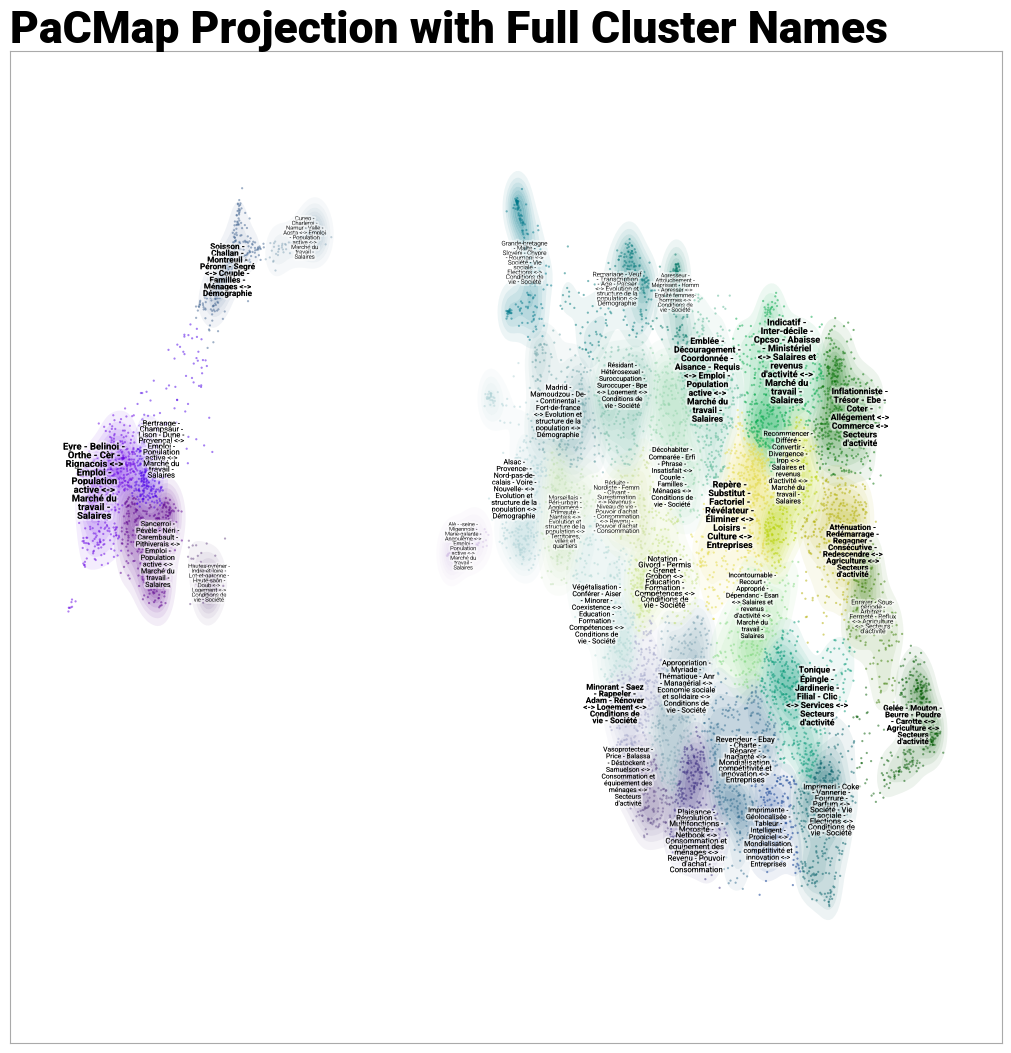

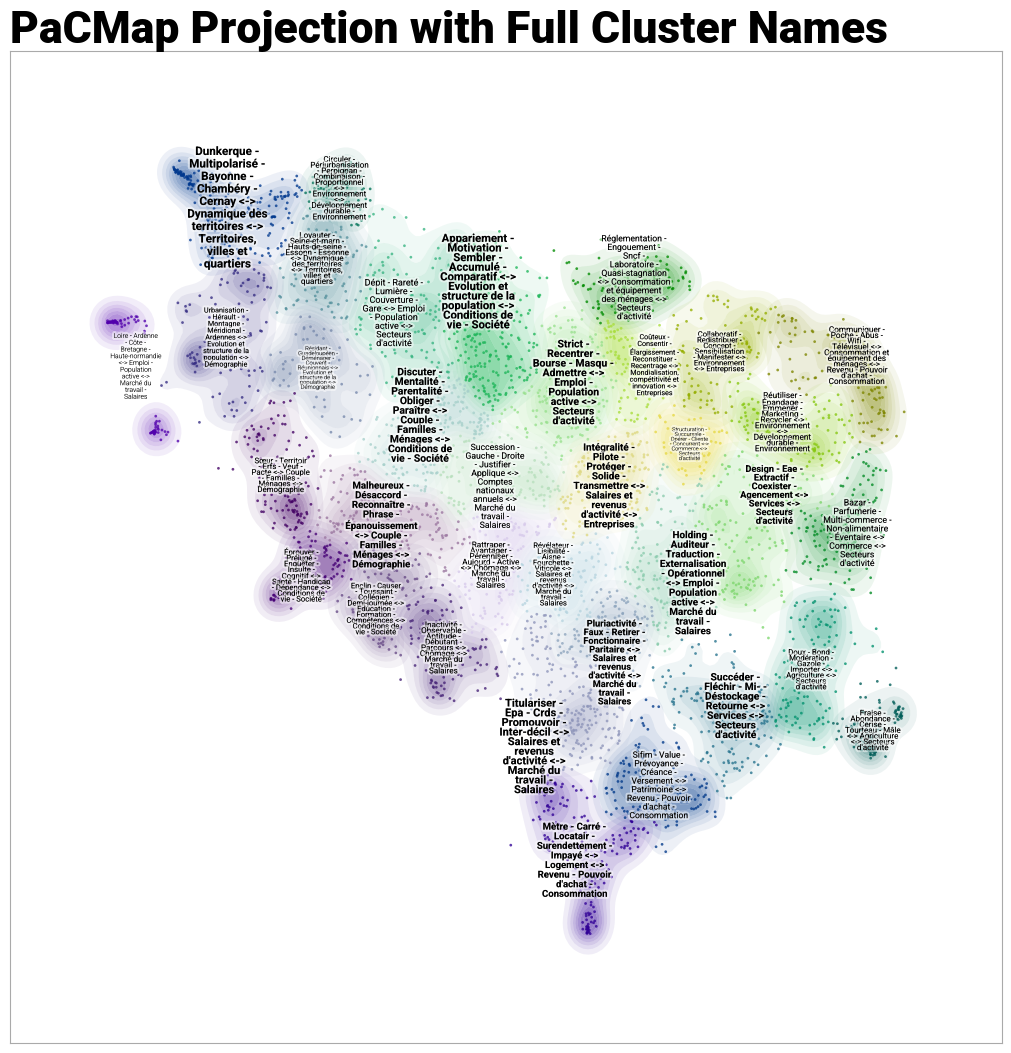

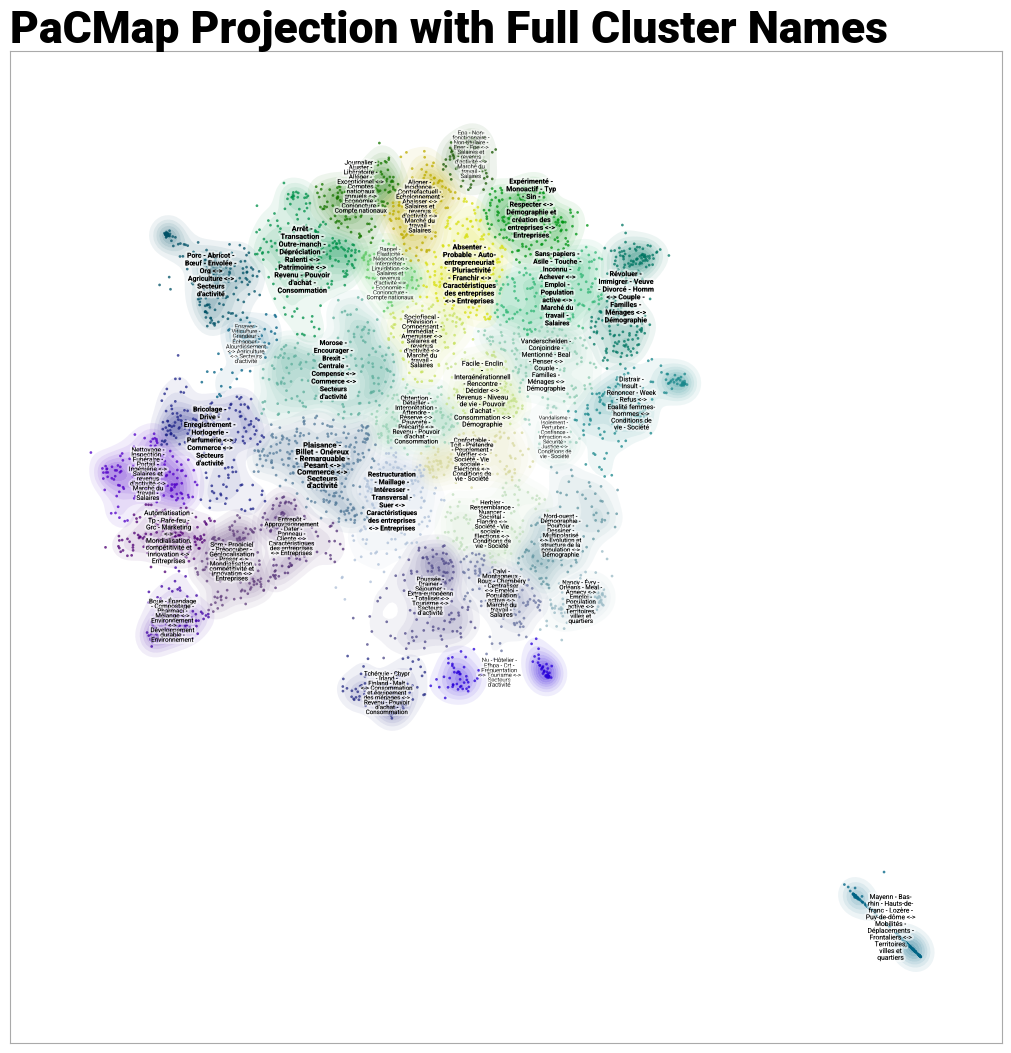

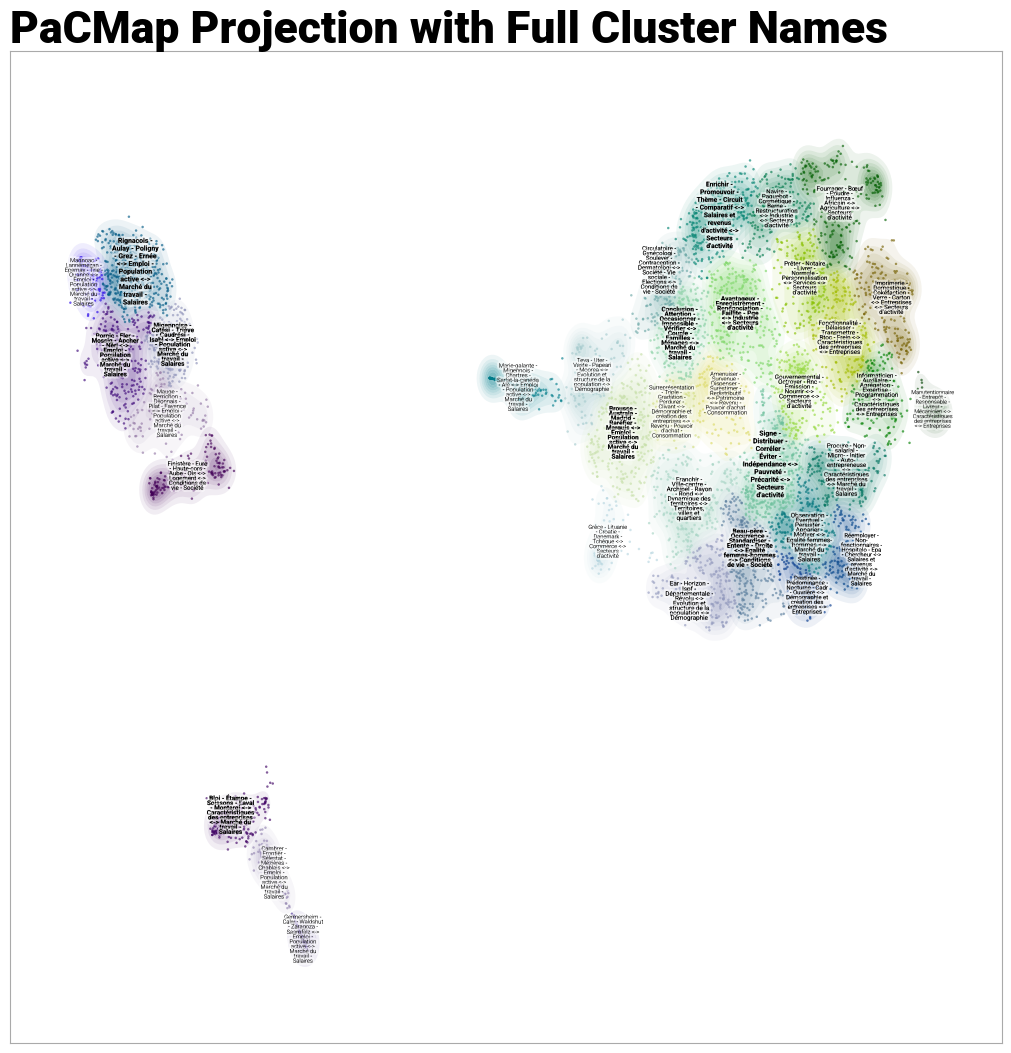

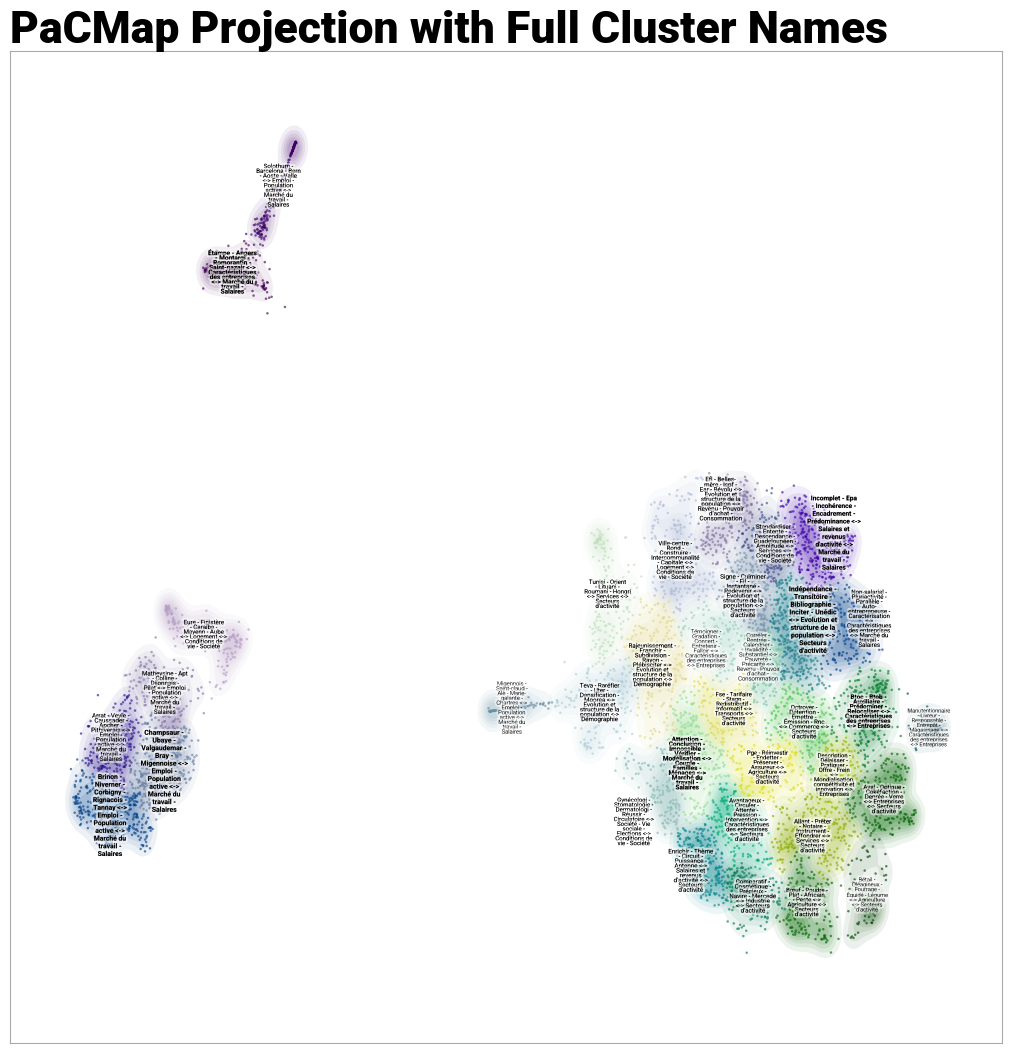

In [122]:
# Load the trained model
#model = Word2Vec.load("/home/paul/Desktop/INSEE projet stat/output/insee_publications_complete/word2vec_insee_premiere_complet.model")

class INSEEClusterAnalyzer:
    def __init__(self, model):
        self.model = model

    def generate_cluster_name(self, words_in_cluster):
        """Generate a cluster name using the three most central words in Word2Vec space."""
        if not words_in_cluster or len(words_in_cluster) < 2:
            return "Cluster sans nom"

        try:
            # Filter words to keep only those in Word2Vec vocabulary
            valid_words = [word for word in words_in_cluster if word in self.model.wv and self.model.wv.word_freq.get(word) > 2]
            if not valid_words:
                return "Cluster sans nom"

            # Compute the average vector of the cluster
            cluster_vector = np.mean([self.model.wv[word] for word in valid_words], axis=0)

            closest_words = sorted(
                valid_words,
                key=lambda word: 1 - cosine(cluster_vector, self.model.wv[word]),  # 1 - cosine distance = similarity
                reverse=True
            )[:5]

            closest_words_for_category = sorted(
                valid_words,
                key=lambda word: 1 - cosine(cluster_vector, self.model.wv[word]),  # 1 - cosine distance = similarity
                reverse=True
            )[:15]

            category_counts = {}
            theme_counts = {}

            # Get category for each word and count occurrences
            for word in closest_words_for_category:
                category = model.wv.word_most_common_category.get(word)
                theme = model.wv.word_most_common_theme.get(word)
                category_counts[category] = category_counts.get(category, 0) + 1
                theme_counts[theme] = theme_counts.get(theme, 0) + 1

            most_common_category, count = max(category_counts.items(), key=lambda x: x[1])
            most_common_theme, count = max(theme_counts.items(), key=lambda x: x[1])
            # Join the words into a descriptive cluster name
            cluster_name = " - ".join([word.capitalize() for word in closest_words]) + " <-> " + most_common_category + " <-> " + most_common_theme

            print(f"Generated cluster name: {cluster_name}")
            return cluster_name

        except Exception as e:
            print(f"Error generating cluster name: {e}")
            return "Cluster thématique"


    def get_word_vectors(self):
        """Get word vectors with appropriate dimensionality checks"""
        words = list(self.model.wv.index_to_key)
        # Ensure we get consistent vector dimensions
        vectors = []
        for word in words:
            vec = self.model.wv[word]
            # Ensure each vector is 1D
            if len(vec.shape) > 1:
                vec = vec.flatten()
            vectors.append(vec)
        # Stack vectors into a 2D array (n_samples x n_features)
        return words, np.vstack(vectors)
    #def get_word_vectors(self):
     #   words = list(self.model.wv.index_to_key)
      #  vectors = np.array([self.model.wv[word] for word in words])
       # return words, vectors

    #def reduce_dimensions(self, vectors):
     #   reducer = umap.UMAP(n_neighbors=30, min_dist=0.05, metric='cosine', random_state=seed_value)
      #  return reducer.fit_transform(vectors)
    def reduce_dimensions(self, vectors):
        """Reduce dimensions with proper error handling and type conversion"""
        try:
            # Ensure we have a proper numpy array, not sparse
            vectors_dense = np.array(vectors, dtype=np.float64)

            # Print shape information for debugging
            print(f"Vectors shape before PacMAP: {vectors_dense.shape}")

            # Check for NaN or inf values that could cause problems
            if np.isnan(vectors_dense).any() or np.isinf(vectors_dense).any():
                print("Warning: Input vectors contain NaN or inf values. Replacing with zeros.")
                vectors_dense = np.nan_to_num(vectors_dense)

            # Use pacmap with explicit data type
            reducer = pacmap.PaCMAP(n_components=2, n_neighbors=30, random_state=seed_value, apply_pca=False)
            #reducer = umap.UMAP(
             #   n_neighbors=30,
             #   min_dist=0.05,
             #   metric='cosine',
             #   random_state=seed_value
            #)
            reduced = reducer.fit_transform(vectors_dense)
            print(f"Reduced vectors shape: {reduced.shape}")
            return reduced

        except Exception as e:
            print(f"Error in dimension reduction: {e}")
            # If UMAP fails, try a simpler approach for fallback
            from sklearn.decomposition import PCA
            print("Falling back to PCA for dimension reduction")
            pca = PCA(n_components=2, random_state=seed_value)
            return pca.fit_transform(vectors)

    def determine_optimal_clusters(self, vectors):
        #optimal_k = OptimalK(parallel_backend='joblib')
        n_clusters = 35
        print(f"Optimal n_clusters determined: {n_clusters}")
        return n_clusters


    def perform_clustering(self, vectors, method='kmeans'):
        if method == 'kmeans':
            n_clusters = self.determine_optimal_clusters(vectors)
            model = KMeans(n_clusters=n_clusters, random_state=seed_value , n_init=10)
        else:
            n_clusters = self.determine_optimal_clusters(vectors)
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
        return model.fit_predict(vectors)

    def export_clusters(self, words, labels,period, method):
        cluster_data = pd.DataFrame({"word": words, "cluster": labels})
        output_file = f"clusters_{method}_{period}.txt"

        clusters_themes = {}  # Dictionary to store thematic names
        with open(output_file, "w", encoding="utf-8") as f:
            for cluster in sorted(cluster_data['cluster'].unique()):
                cluster_words = cluster_data[cluster_data['cluster'] == cluster]['word'].tolist()
                cluster_name = self.generate_cluster_name(cluster_words)

                clusters_themes[cluster] = cluster_name  # Store the name

                f.write(f"{cluster_name} (Cluster {cluster})\n")
                f.write("-" * 20 + "\n")
                f.write(f"Cluster size: {len(cluster_words)}\n")
                f.write(", ".join(cluster_words) + "\n\n")

        print(f"Clusters saved to {output_file}")
        return clusters_themes  # Return names for visualization

    def visualize_clusters(self, embedding, labels, words, method, clusters_themes=None):
        df = pd.DataFrame({"x": embedding[:, 0], "y": embedding[:, 1], "word": words, "cluster": labels})
        fig = go.Figure()

        for cluster in sorted(df['cluster'].unique()):
            cluster_data = df[df['cluster'] == cluster]

            # Utiliser le nom thématique du cluster s'il est disponible
            if clusters_themes and cluster in clusters_themes:
                cluster_name = clusters_themes[cluster]
            else:
                cluster_name = f'Cluster {cluster}'

            fig.add_trace(go.Scatter(
                x=cluster_data['x'],
                y=cluster_data['y'],
                mode='markers',
                name=cluster_name,
                text=cluster_data['word'],  # Ajouter les mots comme info au survol
                hoverinfo='text'
            ))

        fig.update_layout(
            title_text=f"Visualization of {method} Clusters",
            title_x=0.5,
            legend_title="Clusters thématiques"
        )

        fig.show()

    def create_dmp_plot(self, embedding, labels,method,period, clusters_themes=None):
      # Original plot with full cluster names
      cluster_names = [clusters_themes[label] if clusters_themes and label in clusters_themes else f'Cluster {label}' for label in labels]
      #print("pomme : ", cluster_names)
      fig, ax = dmp.create_plot(
          embedding,
          cluster_names,
          label_over_points=True,
          dynamic_label_size=True,
          add_glow = True,
          color_label_text=False,
          cmap = matplotlib.colormaps.get_cmap("viridis"),
          title="PaCMap Projection with Full Cluster Names",
      )
      fig.savefig(f"PaCMap_{method}_{period}_full.svg")

if __name__ == "__main__":
    # Load the trained model
    #model = Word2Vec.load("/home/paul/Desktop/INSEE projet stat/output/insee_publications_complete/word2vec_insee_premiere_complet.model")
    for period in ["2010-2025","2010-2013", "2014-2017", "2018-2021","2022-2025"]:
        model = Word2Vec.load(f"/content/embedding{period}.model")
        cluster_analyzer = INSEEClusterAnalyzer(model)
        words, vectors = cluster_analyzer.get_word_vectors()
        reduced_vectors = cluster_analyzer.reduce_dimensions(vectors)
        clusters_themes = []

        for method in ['agglomerative']: #'kmeans'
            labels = cluster_analyzer.perform_clustering(reduced_vectors, method=method)
            clusters_themes= cluster_analyzer.export_clusters(words, labels, period,method)
            cluster_analyzer.visualize_clusters(reduced_vectors, labels, words, method, clusters_themes)
            cluster_analyzer.create_dmp_plot(reduced_vectors, labels, method,period, clusters_themes)

        print("Analysis complete.")

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
from scipy.linalg import orthogonal_procrustes

# Function to align embeddings
def align_embeddings(source_model, target_model, shared_words):
    source_embeddings = np.array([source_model.wv[word] for word in shared_words])
    target_embeddings = np.array([target_model.wv[word] for word in shared_words])
    R, _ = orthogonal_procrustes(source_embeddings, target_embeddings)
    source_model.wv.vectors = np.dot(source_model.wv.vectors, R)
    return source_model, R

# Get shared vocabulary across all models
def get_shared_vocabulary(models):
    vocabs = [set(model.wv.index_to_key) for model in models]
    shared_vocab = set.intersection(*vocabs)
    return list(shared_vocab)

# Track word movement across time periods
def track_word_movement(models, aligned_models, target_words):
    results = {}
    for word in target_words:
        word_positions = []
        for model in aligned_models:
            if word in model.wv:
                word_positions.append(model.wv[word])
        results[word] = word_positions
    return results

# Get nearest neighbors of a word
def get_nearest_neighbors(model, word, num_neighbors=5):
    if word in model.wv:
        return model.wv.most_similar(word, topn=num_neighbors)
    return []


def visualize_word_trajectory_with_neighbors_plotly(models, word_positions, target_words, time_periods, all_words):
    """Visualize word trajectories with movement across time periods using PaCMAP, suitable for scientific papers,
    with emphasis on frequency, category, and theme, and size proportional to frequency."""

    # Apply PaCMAP for dimensionality reduction
    reducer = pacmap.PaCMAP(n_components=2, n_neighbors=30, random_state=1312, apply_pca=False)
    positions_2d = reducer.fit_transform(word_positions)

    # Create figure
    fig = go.Figure()

    # Plot background words in light gray with labels and size proportional to count
    for i, word in enumerate(all_words):
        if word not in target_words:
            fig.add_trace(go.Scatter(
                x=[positions_2d[i][0]],
                y=[positions_2d[i][1]],
                mode='text',
                text=[word],
                textposition='top center',
                textfont=dict(size=3, color='gray'),
                showlegend=False,
            ))

    # Highlight trajectories of the target words
    for word in target_words:
        if word in all_words:
            word_idx = all_words.index(word)
            trajectory = [positions_2d[word_idx + i] for i in range(len(time_periods))]

            # Iterate through all time periods (models) and get word frequency, category, and theme
            word_freqs = []
            categories = []
            themes = []
            for i, period in enumerate(time_periods):
                model = models[i]  # Use the model for this time period
                word_freqs.append(model.wv.word_freq.get(word, 1))
                categories.append(model.wv.word_most_common_category.get(word, 'N/A'))
                themes.append(model.wv.word_most_common_theme.get(word, 'N/A'))

            # Plot the trajectory for the target word
            x_vals = [pos[0] for pos in trajectory]
            y_vals = [pos[1] for pos in trajectory]
            fig.add_trace(go.Scatter(
                x=x_vals,
                y=y_vals,
                mode='lines+markers',
                name=word,
                marker=dict(
                    size=1,  # Scale size for target words using the last period's frequency
                    color='red',
                    line=dict(width=2, color='black')
                ),
                line=dict(width=2),
            ))

            # Add annotations for the target word with slight offset
            for i in range(len(trajectory)):
                offset = random.uniform(0.05, 0.1)  # Random offset to avoid overlap
                fig.add_annotation(
                    x=trajectory[i][0] + offset,
                    y=trajectory[i][1] + offset,
                    text=f"{word}<br>Category: {categories[i]}<br>Theme: {themes[i]}<br>Freq : {word_freqs[i]}",
                    showarrow=False,  # No arrow
                    font=dict(size=12, color='red')
                )

            # Annotate dates for each time period
            for i, period in enumerate(time_periods):
                fig.add_annotation(
                    x=trajectory[i][0],
                    y=trajectory[i][1],
                    text=period,
                    showarrow=False,
                    font=dict(size=10, color='blue'),
                    opacity=0.7
                )

            # Add neighboring words for each time period with size proportional to frequency
            for i, period in enumerate(time_periods):
                neighbors = get_nearest_neighbors(models[i], word)
                for neighbor, _ in neighbors:
                    # Get word frequency, category, and theme for each neighbor in the corresponding model
                    neighbor_freq = models[i].wv.word_freq.get(neighbor, 1)
                    size = neighbor_freq / 10  # Scale neighbor size
                    neighbor_category = models[i].wv.word_most_common_category.get(neighbor, 'N/A')
                    neighbor_theme = models[i].wv.word_most_common_theme.get(neighbor, 'N/A')

    # Update layout for scientific publication
    fig.update_layout(
        title="Word Trajectories and Neighboring Words in 2D Space Using PaCMAP",
        title_x=0.5,
        title_y=0.95,
        xaxis_title="Dimension 1 (PaCMAP)",
        yaxis_title="Dimension 2 (PaCMAP)",
        showlegend=True,
        hovermode="closest",
        template="plotly_white",  # Cleaner look suitable for papers
        width=1000,
        height=800,
        margin=dict(l=50, r=50, t=50, b=50),
        plot_bgcolor='white'
    )

    # Show the plot
    fig.show()

# Example call for visualizing word trajectories
models = []
time_periods = []
for period in ["2010-2013", "2014-2017", "2018-2021", "2022-2025"]:
    model = Word2Vec.load(f"/content/embedding{period}.model")
    models.append(model)
    time_periods.append(period)

# Get shared vocabulary across all models
# Get shared vocabulary across all models
shared_words = get_shared_vocabulary(models)

# Align all models to the last one
aligned_models = [models[-1]]
for i in range(len(models)-2, -1, -1):
    aligned_model, _ = align_embeddings(models[i], models[i+1], shared_words)
    aligned_models.insert(0, aligned_model)

# Track words of interest
target_words = ["décile"]
trajectories = track_word_movement(models, aligned_models, target_words)

# Visualize the trajectories of the target words with movement across time periods
all_words = list(set(target_words).union(shared_words))  # Union of target and shared words
word_positions = [model.wv[word] for word in all_words]  # Get word embeddings for all words

# Visualize trajectories with neighbors and time labels
visualize_word_trajectory_with_neighbors_plotly(models,word_positions, target_words, time_periods, all_words)


In [15]:
decile_periods=[]
for period in ["2010-2013", "2014-2017", "2018-2021", "2022-2025"]:
    model = Word2Vec.load(f"/content/embedding{period}.model")
    model.wv.word_category_counts.get("décile")["Period"] = period
    decile_periods.append(model.wv.word_category_counts.get("décile"))

df = pd.DataFrame.from_dict(decile_periods)
df = df.fillna(0)
df

Caractéristiques des entreprises  Pauvreté - Précarité  \
0                               5.0                    38   
1                               0.0                    34   
2                               0.0                    22   
3                               0.0                    22   

   Revenus - Niveau de vie - Pouvoir d'achat - Consommation  \
0                                                 48          
1                                                 32          
2                                                121          
3                                                121          

   Salaires et revenus d'activité  Logement  Economie sociale et solidaire  \
0                              40       3.0                            1.0   
1                              64       0.0                            0.0   
2                             136      30.0                            0.0   
3                             136      30.0                            0.0   

   Société - Vie sociale - Elections  Emploi - Population active  \
0                               15.0                         1.0   
1                                0.0                         0.0   
2                                0.0                         2.0   
3                                0.0                         2.0   

   Economie générale  Education - Formation - Compétences  ...  \
0                8.0                                  7.0  ...   
1               15.0                                  0.0  ...   
2                0.0                                  5.0  ...   
3                0.0                                  5.0  ...   

  Dynamique des territoires  Egalité femmes-hommes  \
0                       0.0                    0.0   
1                       0.0                    0.0   
2                       1.0                   44.0   
3                       1.0                   44.0   

   Mondialisation, compétitivité et innovation  \
0                                          0.0   
1                                          0.0   
2                                        103.0   
3                                        103.0   

   Protection sociale - Retraites  Agriculture  \
0                             0.0          0.0   
1                             0.0          0.0   
2                            12.0          1.0   
3                            12.0          1.0   

   Evolution et structure de la population  Industrie  \
0                                      0.0        0.0   
1                                      0.0        0.0   
2                                     34.0       23.0   
3                                     34.0       23.0   

   Mobilités - Déplacements - Frontaliers  Tourisme  Comptes nationaux annuels  
0                                     0.0       0.0                        0.0  
1                                     0.0       0.0                        0.0  
2                                    27.0       7.0                        3.0  
3                                    27.0       7.0                        3.0  

[4 rows x 24 columns]

<ipython-input-14-b9b7149b4f83>:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  my_palette = plt.cm.get_cmap("Set2", len(df.index))


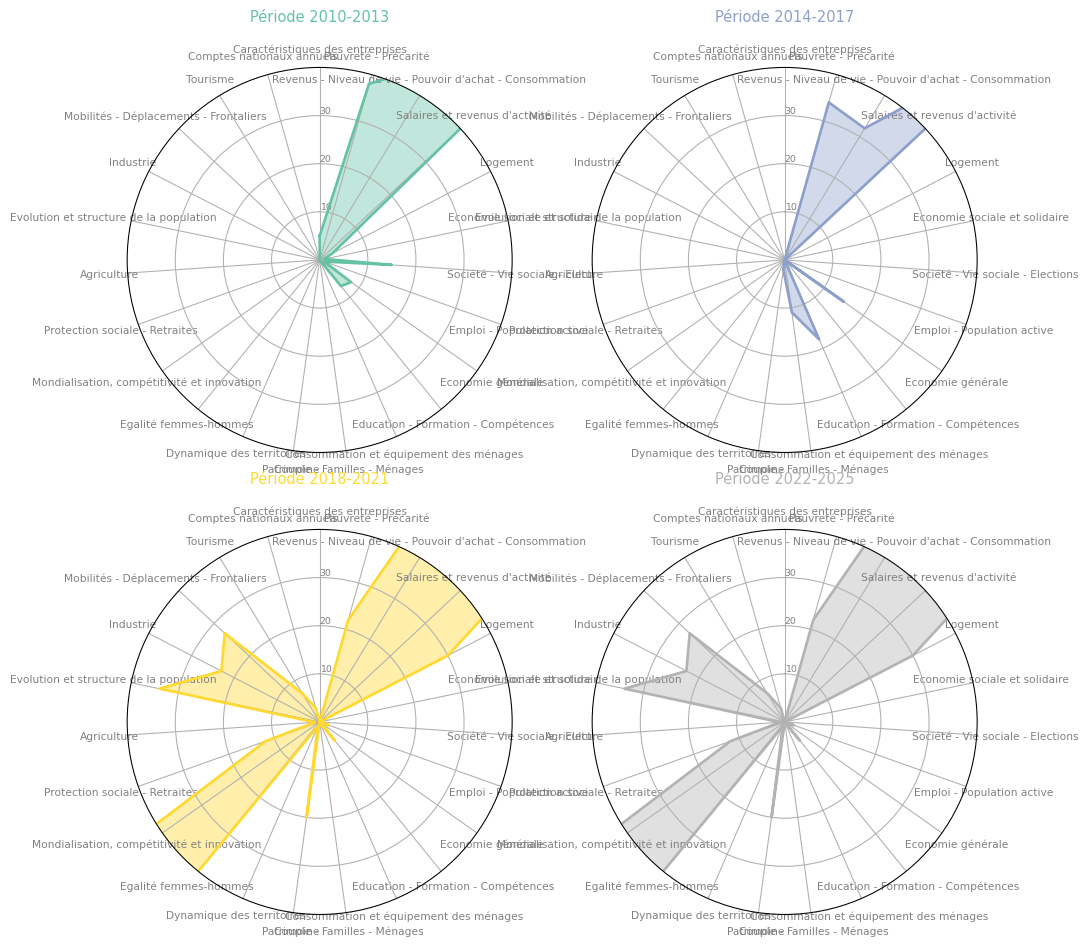

In [14]:
import matplotlib.pyplot as plt
from math import pi
def make_spider( row, title, color):

    # number of variable
    categories = [col for col in df.columns if col != 'Period']
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,40)

    # Ind1
    values=df.loc[row].drop('Period').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)


# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1100/my_dpi, 1100/my_dpi), dpi=my_dpi)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))

# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='Période '+df['Period'][row], color=my_palette(row))

In [18]:
decile_periods=[]
for period in ["2010-2013", "2014-2017", "2018-2021", "2022-2025"]:
    model = Word2Vec.load(f"/content/embedding{period}.model")
    model.wv.word_theme_counts.get("décile")["Period"] = period
    decile_periods.append(model.wv.word_theme_counts.get("décile"))

df = pd.DataFrame.from_dict(decile_periods)
df = df.fillna(0)
df

Entreprises  Revenu - Pouvoir d'achat - Consommation  \
0          5.0                                       86   
1          0.0                                       86   
2        103.0                                      175   
3        103.0                                      175   

   Marché du travail - Salaires  Conditions de vie - Société  \
0                            41                         25.0   
1                            64                          0.0   
2                           138                         79.0   
3                           138                         79.0   

   Secteurs d'activité  Economie - Conjoncture - Compte nationaux     Period  \
0                  1.0                                          8  2010-2013   
1                  0.0                                         15  2014-2017   
2                 31.0                                          3  2018-2021   
3                 31.0                                          3  2022-2025   

   Démographie  Territoires, villes et quartiers  
0          0.0                               0.0  
1         11.0                               0.0  
2         34.0                              28.0  
3         34.0                              28.0

<ipython-input-19-b9b7149b4f83>:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  my_palette = plt.cm.get_cmap("Set2", len(df.index))


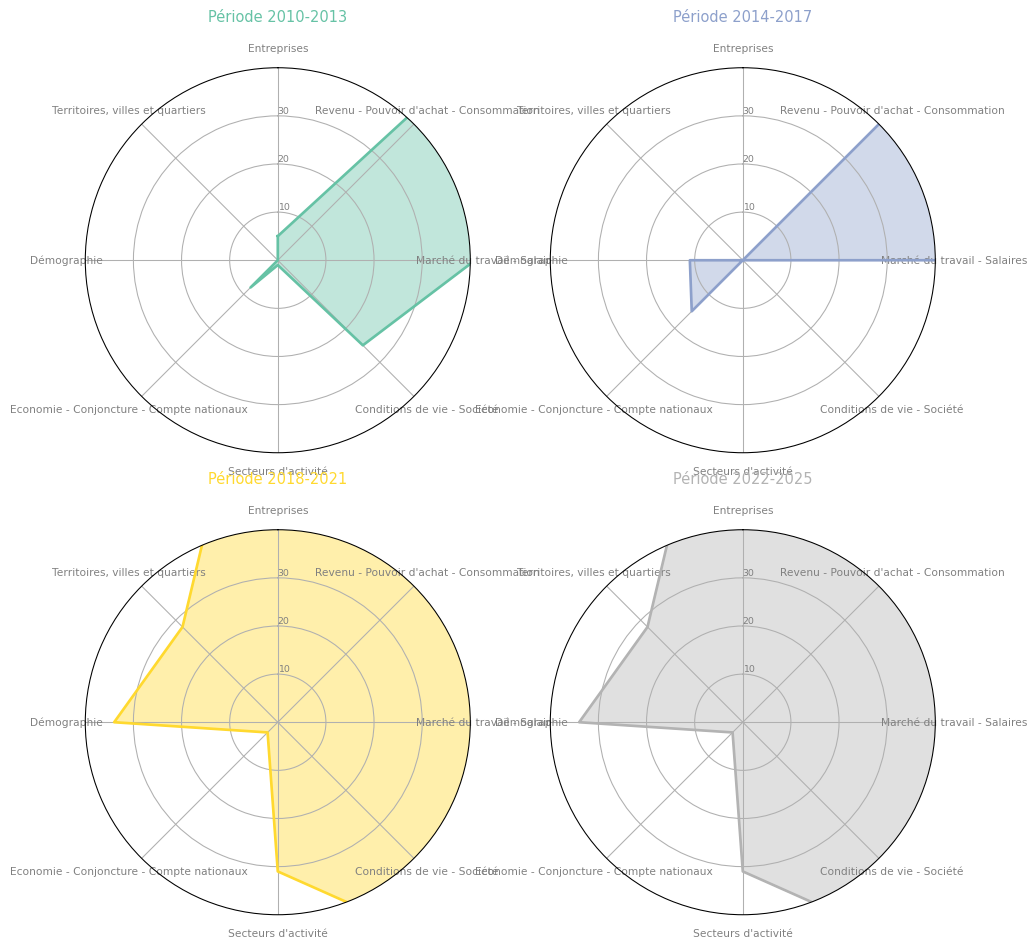

In [19]:
import matplotlib.pyplot as plt
from math import pi
def make_spider( row, title, color):

    # number of variable
    categories = [col for col in df.columns if col != 'Period']
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,40)

    # Ind1
    values=df.loc[row].drop('Period').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)


# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1100/my_dpi, 1100/my_dpi), dpi=my_dpi)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))

# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='Période '+df['Period'][row], color=my_palette(row))